**Алгоритмы анализа данных**

**Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск**

Домашнее задание №2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

__Задача:__ предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [58]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [59]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot(X.T, (y_pred - y)) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [60]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [61]:
X_st = X.copy().astype(np.float64)

for i in range(len(X_st)):
    X_st[i] = calc_std_fit(X_st[i])
    print(X_st[i])

[-0.57735027 -0.57735027  1.73205081 -0.57735027]
[-0.57735027 -0.57735027  1.73205081 -0.57735027]
[-0.57940718 -0.57632113  1.73204943 -0.57632113]
[-0.58249071 -0.5670349   1.73201633 -0.58249071]
[-0.57894479 -0.57575501  1.73204971 -0.5773499 ]
[-0.57638682 -0.57927597  1.7320496  -0.57638682]
[-0.58043426 -0.57426353  1.73204669 -0.5773489 ]
[-0.58158972 -0.57117319  1.73203785 -0.57927494]
[-0.57735027 -0.57735027  1.73205081 -0.57735027]
[-0.57889218 -0.57657893  1.73205004 -0.57657893]


In [62]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [63]:
W

array([-9.34768118, -5.96638327, 25.0914415 , -7.26082309])

In [67]:
lambda_list = np.linspace(1e-8, 1e-4, 100)
lambda_list

array([1.000e-08, 1.020e-06, 2.030e-06, 3.040e-06, 4.050e-06, 5.060e-06,
       6.070e-06, 7.080e-06, 8.090e-06, 9.100e-06, 1.011e-05, 1.112e-05,
       1.213e-05, 1.314e-05, 1.415e-05, 1.516e-05, 1.617e-05, 1.718e-05,
       1.819e-05, 1.920e-05, 2.021e-05, 2.122e-05, 2.223e-05, 2.324e-05,
       2.425e-05, 2.526e-05, 2.627e-05, 2.728e-05, 2.829e-05, 2.930e-05,
       3.031e-05, 3.132e-05, 3.233e-05, 3.334e-05, 3.435e-05, 3.536e-05,
       3.637e-05, 3.738e-05, 3.839e-05, 3.940e-05, 4.041e-05, 4.142e-05,
       4.243e-05, 4.344e-05, 4.445e-05, 4.546e-05, 4.647e-05, 4.748e-05,
       4.849e-05, 4.950e-05, 5.051e-05, 5.152e-05, 5.253e-05, 5.354e-05,
       5.455e-05, 5.556e-05, 5.657e-05, 5.758e-05, 5.859e-05, 5.960e-05,
       6.061e-05, 6.162e-05, 6.263e-05, 6.364e-05, 6.465e-05, 6.566e-05,
       6.667e-05, 6.768e-05, 6.869e-05, 6.970e-05, 7.071e-05, 7.172e-05,
       7.273e-05, 7.374e-05, 7.475e-05, 7.576e-05, 7.677e-05, 7.778e-05,
       7.879e-05, 7.980e-05, 8.081e-05, 8.182e-05, 

In [77]:
W_list_1 = []
W_list_2 = []
W_list_3 = []
W_list_4 = []

for lmbd in lambda_list:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lmbd)
    W_list_1.append(W[0])
    W_list_2.append(W[1])
    W_list_3.append(W[2])
    W_list_4.append(W[3])

In [78]:
len(lambda_list)

100

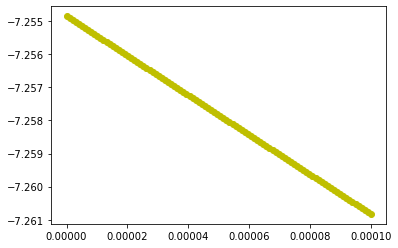

In [84]:
# plt.scatter(W_list_1, lambda_list, c='r')
# plt.scatter(W_list_2, lambda_list, c='g')
# plt.scatter(W_list_3, lambda_list, c='b')
plt.scatter(lambda_list, W_list_4, c='y')
plt.show()

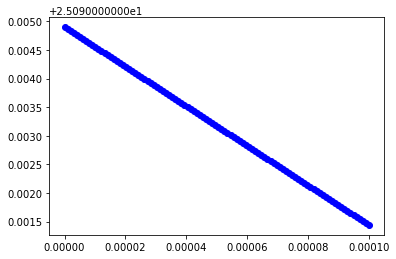

In [85]:
plt.scatter(lambda_list, W_list_3, c='b')
plt.show()

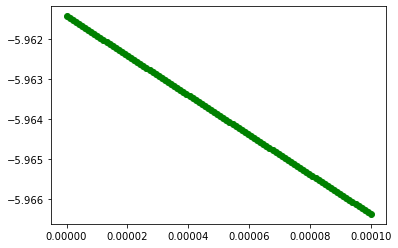

In [86]:
plt.scatter(lambda_list, W_list_2, c='g')


2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$


In [96]:
def gradient_descent_reg_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        # градиент регуляризации
        dReg = lambda_*np.sign(W)
        
        W -= alpha * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [97]:
W_L1 = gradient_descent_reg_l1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-8)

Iter: 0, weights: [-1.13074635 -0.11360985  1.51367117 -1.12537675], error 3417.6268979101683
Iter: 500, weights: [-8.8987739  -7.43521505 24.24997329 -8.77204603], error 160.18636190483267
Iter: 1000, weights: [-9.06596    -7.20558648 24.2496316  -8.83414671], error 160.1694544796257
Iter: 1500, weights: [-9.23312442 -6.97599864 24.24928997 -8.8962284 ], error 160.1525527172285
Iter: 2000, weights: [-9.40026716 -6.74645153 24.2489484  -8.9582911 ], error 160.13565661564922
Iter: 2500, weights: [-9.56738822 -6.51694514 24.24860688 -9.02033481], error 160.118766172897
Iter: 3000, weights: [-9.7344876  -6.28747946 24.24826542 -9.08235955], error 160.10188138698155
Iter: 3500, weights: [-9.90156531 -6.05805449 24.24792402 -9.14436531], error 160.08500225591325
Iter: 4000, weights: [-10.06862136  -5.82867021  24.24758267  -9.2063521 ], error 160.06812877770315
Iter: 4500, weights: [-10.23565574  -5.59932662  24.24724138  -9.26831991], error 160.0512609503631
Final MSE: 160.03439877190567


3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [ ]:
да

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [102]:
from sklearn import datasets
from sklearn import linear_model


In [103]:
data, target, coef = datasets.make_regression(n_samples = 1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)


In [109]:
data

array([[ 0.37879447, -0.61837549],
       [-0.65293115, -1.06706712],
       [-1.06581629, -0.34682333],
       ...,
       [ 1.19451016,  1.00147133],
       [ 0.1256231 ,  0.35261274],
       [-0.05674652,  0.41214611]])

In [110]:
target

array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
       -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
       -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
       -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
        3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
       -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
        1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
        1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
        1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
        6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
        1.21274981e+01,  9.99648515e+01,  8.47610760e+01, -1.05265489e+02,
        1.35034101e+02, -3.24978496e+02,  6.56243085e+01, -4.80030943e+01,
        8.43343786e+01,  3.38914896e+00,  2.65015621e+01,  6.26227854e+01,
       -1.45046490e+02,  

In [111]:
coef

array([62.6735955, 68.0472182])

In [105]:
# создадим модель
linear_regressor = linear_model.LinearRegression()

# обучим её
linear_regressor.fit(data, target)

LinearRegression()